Linear Kernel Accuracy: 0.956140350877193
RBF Kernel Accuracy: 0.9736842105263158


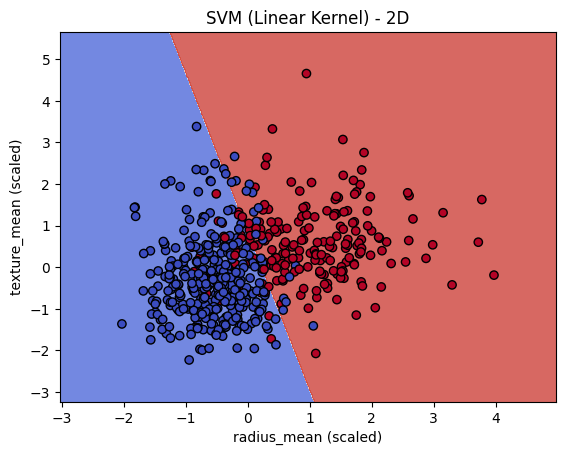

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv(r"C:\Users\shivangi\OneDrive\Desktop\task elevate\breast-cancer.csv")

df = df.drop(columns=['id'])
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 1. Train SVM with Linear and RBF Kernels on all features ---

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

print("Linear Kernel Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))
print("RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))

# --- 2. 2D Visualization using 2 Features ---

def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("radius_mean (scaled)")
    plt.ylabel("texture_mean (scaled)")
    plt.title(title)
    plt.show()

# Choose two features for 2D
X_2d = df[['radius_mean', 'texture_mean']].values
X_2d_scaled = StandardScaler().fit_transform(X_2d)
y_2d = y

# Train and plot
svm_linear_2d = SVC(kernel='linear', C=1)
svm_rbf_2d = SVC(kernel='rbf', C=1, gamma='scale')

svm_linear_2d.fit(X_2d_scaled, y_2d)
svm_rbf_2d.fit(X_2d_scaled, y_2d)

plot_decision_boundary(svm_linear_2d, X_2d_scaled, y_2d, "SVM (Linear Kernel) - 2D")
plot_decision_boundary(svm_rbf_2d, X_2d_scaled, y_2d, "SVM (RBF Kernel) - 2D")

# --- 3. Hyperparameter Tuning using GridSearchCV ---

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best Parameters from GridSearchCV:", grid.best_params_)

# --- 4. Cross-Validation ---

best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
